In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('education_expenditure_supplementary_data.csv',engine='python')

In [3]:
df.dropna()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
6,Czech Republic,All Institutions,Public,4.8,4.2,4.1,4.2,4.1,4.4
...,...,...,...,...,...,...,...,...,...
104,Sweden,Higher Education Institutions,Public,1.6,1.5,1.5,1.6,1.6,1.6
105,Switzerland,Higher Education Institutions,Public,1.1,1.2,1.4,1.4,1.3,1.3
107,United Kingdom,Higher Education Institutions,Public,0.7,0.7,0.9,0.6,0.7,0.9
108,United States,Higher Education Institutions,Public,1.1,0.8,1.0,1.1,1.0,0.9


In [4]:
df1=df.fillna(df.mean())

C:\Users\princ\AppData\Local\Temp/ipykernel_6792/3725003345.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df.fillna(df.mean())


In [5]:
df1.describe()

,1995,2000,2005,2009,2010,2011
count,333.000000,333.000000,333.000000,333.00000,333.000000,333.000000
mean,3.106383,3.062626,3.142453,3.38835,3.392079,2.573050
std,0.947629,0.937460,0.985465,1.03625,1.033496,1.960203
min,0.100000,0.500000,0.300000,0.30000,0.500000,0.000000
25%,3.106383,3.062626,3.142453,3.38835,3.392079,0.900000
50%,3.106383,3.062626,3.142453,3.38835,3.392079,2.573050
75%,3.106383,3.062626,3.142453,3.38835,3.392079,3.900000
max,6.800000,6.600000,7.200000,7.50000,7.600000,7.900000


In [6]:
X=df1[['1995','2000','2005','2009','2010','2011']]
y=df1[['institute_type']]

In [7]:
X

,1995,2000,2005,2009,2010,2011
0,4.900000,4.900000,5.000000,5.40000,5.400000,5.30000
1,4.500000,4.600000,4.300000,4.50000,4.600000,4.30000
2,5.300000,5.400000,5.200000,5.70000,5.600000,5.50000
3,5.000000,5.100000,5.800000,6.40000,6.400000,6.40000
4,5.800000,5.200000,4.800000,5.00000,5.200000,2.57305
...,...,...,...,...,...,...
328,3.106383,3.062626,3.142453,3.38835,3.392079,2.57305
329,3.106383,3.062626,3.142453,3.38835,3.392079,1.20000
330,3.106383,3.062626,3.142453,3.38835,3.392079,2.70000
331,3.106383,3.062626,3.142453,3.38835,3.392079,2.57305


In [8]:
y

,institute_type
0,All Institutions
1,All Institutions
2,All Institutions
3,All Institutions
4,All Institutions
...,...
328,Higher Education Institutions
329,Higher Education Institutions
330,Higher Education Institutions
331,Higher Education Institutions


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)

In [11]:
print("shape of original dataset :", df1.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (333, 9)
shape of input - training set (266, 6)
shape of output - training set (266, 1)
shape of input - testing set (67, 6)
shape of output - testing set (67, 1)


In [12]:
scaler=StandardScaler().fit(x_train)
std_x=scaler.transform(x_train)
std_x_test=scaler.transform(x_test)

In [13]:
normal=MinMaxScaler().fit(x_train)
norm_x=normal.transform(x_train)
norm_x_test=normal.transform(x_test)


In [16]:
print('Mean value=',std_x.mean())
print('std_deviation=',std_x.std())
print('Min value=',norm_x.min())
print('Max value=',norm_x.max())


Mean value= 5.787628800050941e-17
std_deviation= 1.0
Min value= 0.0
Max value= 1.0


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
bestfeat=SelectKBest(score_func=chi2,k=4)
fit=bestfeat.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(X.columns)
featurescores=pd.concat([dfcol,dfscores],axis=1)
featurescores.columns=['specs','scores']
print(featurescores.nlargest(10,'scores'))

  specs      scores
5  2011  140.111256
3  2009   28.305796
2  2005   27.765617
4  2010   26.654342
1  2000   24.249948
0  1995   22.828370


In [49]:
from scipy.stats import pearsonr

In [56]:
pcorr= pearsonr(float(X), y)
print(corr)

TypeError: float() argument must be a string or a number, not 'DataFrame'

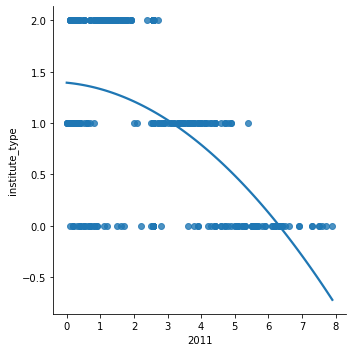

In [27]:
sns.lmplot(x ='2011', y ='institute_type', data = df1, order = 2, ci = None)

In [17]:
institute_type={'All Institutions ':0,'Elementary and Secondary Institutions ':1,'Higher Education Institutions ':2}

In [18]:
df2=df1

In [19]:
df2.institute_type=[institute_type[item] for item in df2.institute_type]

In [20]:
df2

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,0,Public,4.900000,4.900000,5.000000,5.40000,5.400000,5.30000
1,Australia,0,Public,4.500000,4.600000,4.300000,4.50000,4.600000,4.30000
2,Austria,0,Public,5.300000,5.400000,5.200000,5.70000,5.600000,5.50000
3,Belgium,0,Public,5.000000,5.100000,5.800000,6.40000,6.400000,6.40000
4,Canada,0,Public,5.800000,5.200000,4.800000,5.00000,5.200000,2.57305
...,...,...,...,...,...,...,...,...,...
328,Turkey,2,Total,3.106383,3.062626,3.142453,3.38835,3.392079,2.57305
329,United Kingdom,2,Total,3.106383,3.062626,3.142453,3.38835,3.392079,1.20000
330,United States,2,Total,3.106383,3.062626,3.142453,3.38835,3.392079,2.70000
331,Brazil,2,Total,3.106383,3.062626,3.142453,3.38835,3.392079,2.57305


<AxesSubplot:xlabel='2011', ylabel='institute_type'>

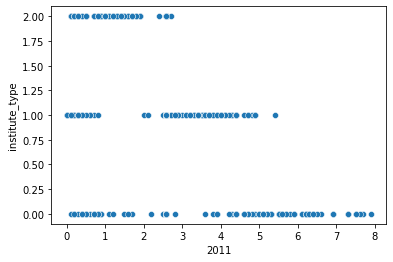

In [43]:
sns.scatterplot(x =X['2011'], y ='institute_type', data = df2)

In [28]:
X=df2[['1995','2000','2005','2009','2010','2011']]
y=df2[['institute_type']]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)

In [29]:
# x_train=x_train['2011']
# x_test=x_test['2011']
print("shape of original dataset :", df1.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (333, 9)
shape of input - training set (266, 6)
shape of output - training set (266, 1)
shape of input - testing set (67, 6)
shape of output - testing set (67, 1)


In [31]:
x_train,y_train

(         1995      2000      2005     2009      2010     2011
 305  3.106383  3.062626  3.142453  3.38835  3.392079  1.90000
 65   3.106383  3.062626  3.900000  3.60000  3.600000  3.50000
 181  3.106383  3.062626  3.142453  3.38835  3.392079  0.40000
 158  3.106383  3.062626  3.142453  3.38835  3.392079  0.30000
 122  3.106383  3.062626  3.142453  3.38835  3.392079  0.70000
 ..        ...       ...       ...      ...       ...      ...
 240  3.106383  3.062626  3.142453  3.38835  3.392079  5.10000
 313  3.106383  3.062626  3.142453  3.38835  3.392079  1.00000
 143  3.106383  3.062626  3.142453  3.38835  3.392079  2.57305
 241  3.106383  3.062626  3.142453  3.38835  3.392079  7.60000
 111  3.106383  3.062626  3.142453  3.38835  3.392079  0.90000
 
 [266 rows x 6 columns],
      institute_type
 305               2
 65                1
 181               1
 158               1
 122               0
 ..              ...
 240               0
 313               2
 143               0
 241   

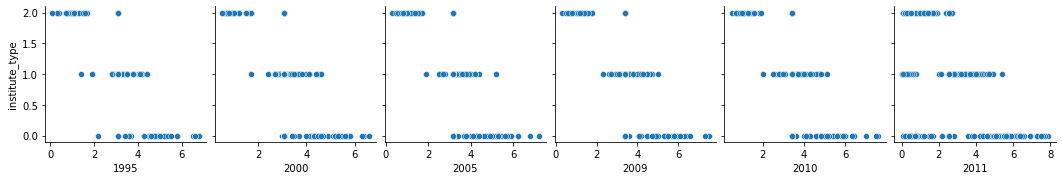

In [35]:
sns.pairplot(df2,x_vars=['1995','2000','2005','2009','2010','2011'],y_vars='institute_type')

In [36]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


LinearRegression()

In [37]:
regression_model.intercept_,regression_model.coef_

(array([2.30370674]),
 array([[-0.10134435, -0.08930636,  0.05837655, -0.3170728 ,  0.17497047,
         -0.15685584]]))

In [55]:
predicted = regression_model.predict(x_test)
predicted

array([[0.55527907],
       [0.07631589],
       [0.30464092],
       [1.37092943],
       [1.15133125],
       [1.19838801],
       [1.4023006 ],
       [1.18270242],
       [1.01438832],
       [1.21407359],
       [1.21407359],
       [1.4023006 ],
       [0.77487724],
       [1.01438832],
       [1.01438832],
       [1.33954508],
       [1.01438832],
       [1.86663676],
       [1.4023006 ],
       [0.88467633],
       [0.57096465],
       [0.50822232],
       [1.35524384],
       [1.86417956],
       [0.44547998],
       [0.18534177],
       [1.38661501],
       [1.33955826],
       [1.38661501],
       [1.37092943],
       [1.01438832],
       [1.36358809],
       [0.49253673],
       [1.01438832],
       [1.15133125],
       [1.52472656],
       [1.30818709],
       [0.82193399],
       [1.13538776],
       [1.74228522],
       [1.92045249],
       [1.01438832],
       [1.37092943],
       [1.26113034],
       [0.55908818],
       [0.33568089],
       [1.33955826],
       [1.370

In [63]:
import numpy as np
y_testarr=np.array(y_test)
y_testarr

array([[0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0]], dtype=int64)

In [68]:
oned=predicted.flatten()

In [73]:
oned.shape

(67,)

In [72]:
import math
predicted_floor=math.floor(oned)

TypeError: only size-1 arrays can be converted to Python scalars

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
from sklearn import metrics

In [42]:
rmse=metrics.r2_score(y_test,predicted)
mae=metrics.mean_absolute_error(y_test,predicted)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)

Root mean squared error:  0.3158591547342199
MAE:  0.5850497378042446


In [45]:
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.10134435 -0.08930636  0.05837655 -0.3170728   0.17497047 -0.15685584]]
Intercept: [2.30370674]
Root mean squared error:  0.3996179434163931
R2 score:  0.38908981063930703


In [47]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)
predictions_logistic = logisticRegr.predict(x_test)

C:\ProgramData\Anaconda3\envs\aa\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
logisticRegr.intercept_

array([-4.66620437, -0.94238182,  5.60858619])

In [53]:
metrics.r2_score(y_test,predictions_logistic)

-0.10416666666666674

In [54]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions_logistic)
accuscore=metrics.accuracy_score(y_test, predictions_logistic)

print(cm)
print(accuscore)


[[12  5  7]
 [ 2  8  9]
 [ 0  9 15]]
0.5223880597014925
